In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import joblib
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)


In [3]:
# Paths
DATA_CSV = "hourly_data_p_s1.csv"     
MODEL_DIR = "models_ps1"
SCALER_DIR = "scalers_ps1"
PLOTS_DIR = "plots_ps1"

# Create directories
os.makedirs(MODEL_DIR, exist_ok=True)
os.makedirs(SCALER_DIR, exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)

# Training settings
N_STEPS = 24
EPOCHS = 60
BATCH_SIZE = 32
VALIDATION_SPLIT = 0.1
PATIENCE = 8
LAST_N_HOURS_TO_PLOT = 200


In [4]:
def create_sequences(values, n_steps=24):
    X, y = [], []
    for i in range(len(values) - n_steps):
        X.append(values[i:i+n_steps])
        y.append(values[i+n_steps])
    return np.array(X), np.array(y).reshape(-1, 1)

def build_model(n_steps):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(n_steps, 1)),
        Dropout(0.1),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


In [5]:
df = pd.read_csv(DATA_CSV, parse_dates=['localminute'])
df = df.sort_values('localminute').reset_index(drop=True)

house_ids = df['dataid'].unique()
print("Total houses found:", len(house_ids))
house_ids


Total houses found: 14


array([ 26, 222, 187, 171, 370, 115, 114, 101,  93, 379,  86,  77,  59,
       252])

Training all the listed houses together and saving the models, scalers and plots !


Training LSTM for House 26
Training samples: 2288 Testing samples: 572


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0121 - mae: 0.0739 - val_loss: 0.0056 - val_mae: 0.0559 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0103 - mae: 0.0664 - val_loss: 0.0051 - val_mae: 0.0573 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0095 - mae: 0.0619 - val_loss: 0.0044 - val_mae: 0.0497 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0091 - mae: 0.0601 - val_loss: 0.0042 - val_mae: 0.0485 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0089 - mae: 0.0591 - val_loss: 0.0041 - val_mae: 0.0491 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0087 - mae: 0.0580 - val_loss: 0.0040 - val_mae: 0.0483 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0086 - mae: 0.0574 - val_loss: 0.0041 - val_mae: 0.0497 - learning_rate: 0.0010
Epoch 8/60
6

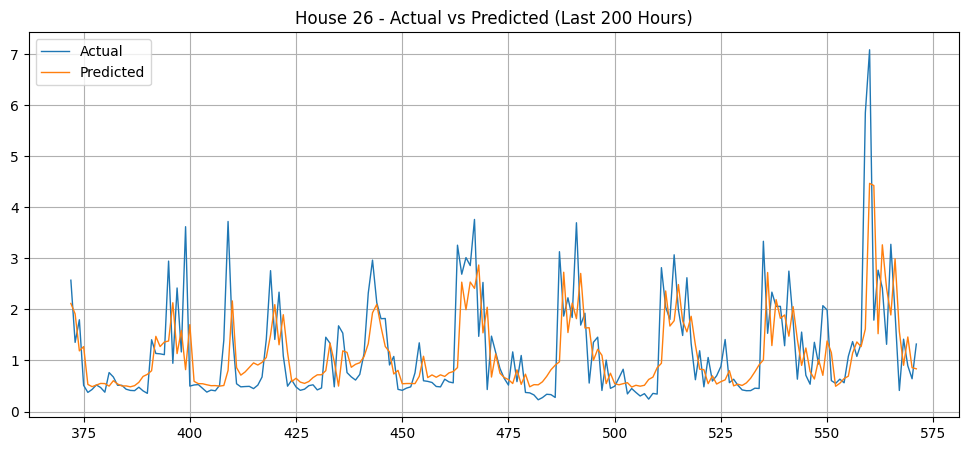

Saved plot: plots_ps1/house_26_last200.png

Training LSTM for House 222
Training samples: 2286 Testing samples: 572
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 10s 60ms/step - loss: 0.0234 - mae: 0.1182 - val_loss: 0.0347 - val_mae: 0.1583 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0162 - mae: 0.1002 - val_loss: 0.0269 - val_mae: 0.1376 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0115 - mae: 0.0830 - val_loss: 0.0222 - val_mae: 0.1215 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0104 - mae: 0.0775 - val_loss: 0.0209 - val_mae: 0.1175 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0097 - mae: 0.0750 - val_loss: 0.0196 - val_mae: 0.1126 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0089 - mae: 0.0716 - val_loss: 0.0184 - val_mae: 0.1091 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0082 - mae: 0.0680 - val_loss: 0.0179 - val_mae: 0.1088 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━

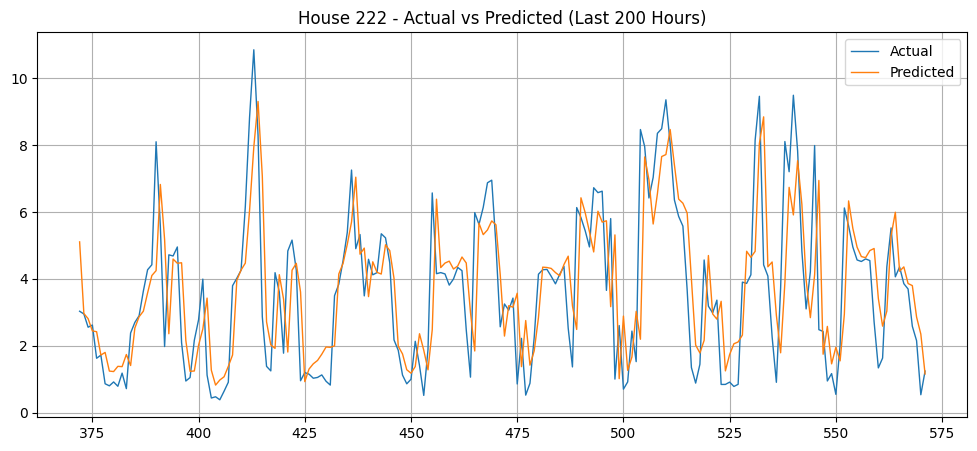

Saved plot: plots_ps1/house_222_last200.png

Training LSTM for House 187
Training samples: 2286 Testing samples: 572


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0126 - mae: 0.0749 - val_loss: 0.0168 - val_mae: 0.0824 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0108 - mae: 0.0679 - val_loss: 0.0159 - val_mae: 0.0805 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mae: 0.0655 - val_loss: 0.0144 - val_mae: 0.0769 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0097 - mae: 0.0631 - val_loss: 0.0132 - val_mae: 0.0755 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0094 - mae: 0.0615 - val_loss: 0.0125 - val_mae: 0.0767 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0091 - mae: 0.0600 - val_loss: 0.0120 - val_mae: 0.0760 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0088 - mae: 0.0586 - val_loss: 0.0118 - val_mae: 0.0759 - learning_rate: 0.0010
Epoch 8/60
65

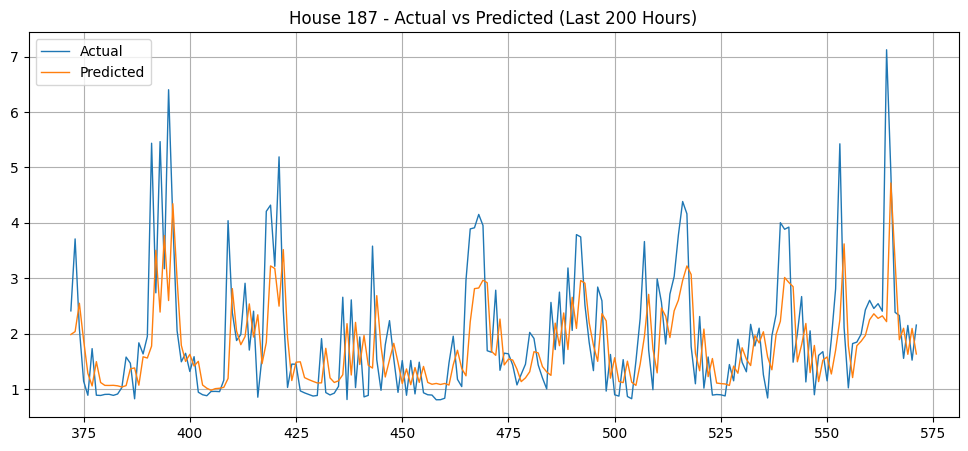

Saved plot: plots_ps1/house_187_last200.png

Training LSTM for House 171
Training samples: 2288 Testing samples: 573
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0101 - mae: 0.0614 - val_loss: 0.0097 - val_mae: 0.0665 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0097 - mae: 0.0597 - val_loss: 0.0095 - val_mae: 0.0660 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 0.0095 - mae: 0.0589 - val_loss: 0.0092 - val_mae: 0.0639 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0091 - mae: 0.0571 - val_loss: 0.0087 - val_mae: 0.0589 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 0.0087 - mae: 0.0548 - val_loss: 0.0084 - val_mae: 0.0569 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0086 - mae: 0.0538 - val_loss: 0.0086 - val_mae: 0.0588 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0085 - mae: 0.0531 - val_loss: 0.0081 - val_mae: 0.0543 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━━

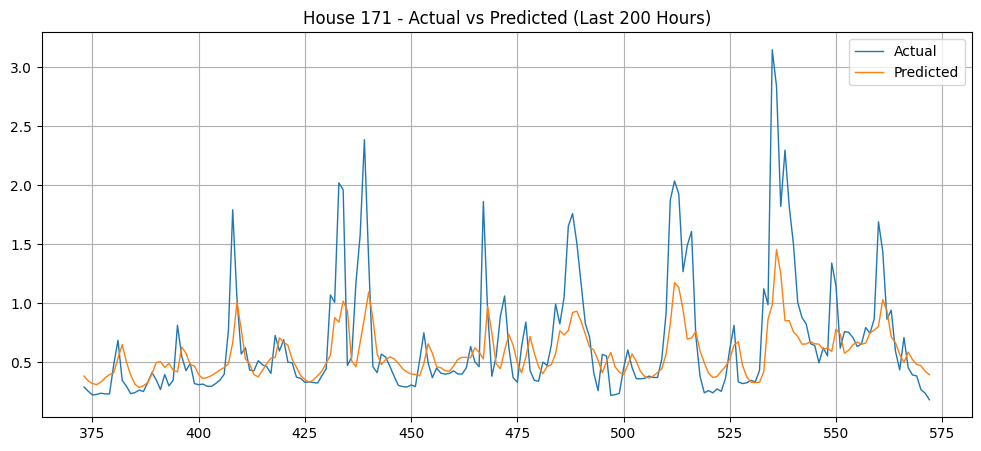

Saved plot: plots_ps1/house_171_last200.png

Training LSTM for House 370
Training samples: 2287 Testing samples: 572


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 59ms/step - loss: 0.0226 - mae: 0.0935 - val_loss: 0.0225 - val_mae: 0.1059 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0199 - mae: 0.0875 - val_loss: 0.0218 - val_mae: 0.1011 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - loss: 0.0187 - mae: 0.0844 - val_loss: 0.0203 - val_mae: 0.0969 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0174 - mae: 0.0808 - val_loss: 0.0182 - val_mae: 0.0928 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.0160 - mae: 0.0768 - val_loss: 0.0158 - val_mae: 0.0835 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0147 - mae: 0.0723 - val_loss: 0.0142 - val_mae: 0.0754 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0141 - mae: 0.0691 - val_loss: 0.0141 - val_mae: 0.0753 - learning_rate: 0.0010
Epoch 8/60
6

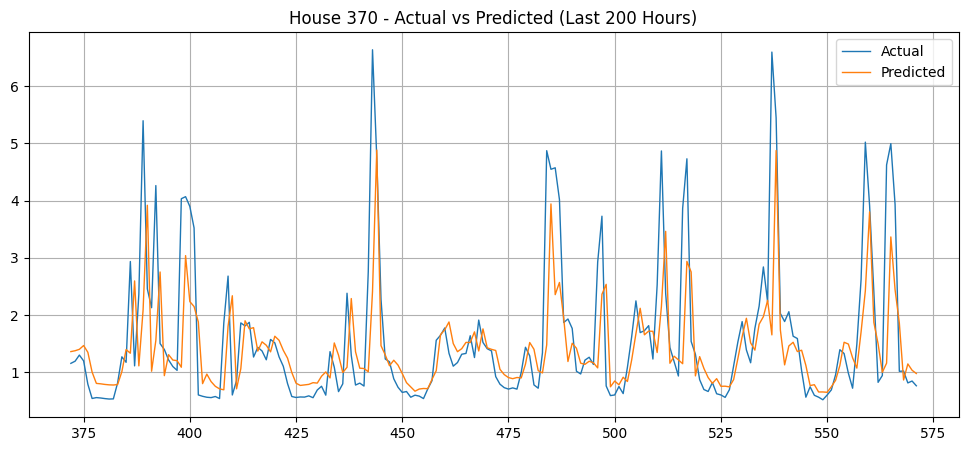

Saved plot: plots_ps1/house_370_last200.png

Training LSTM for House 115
Training samples: 2286 Testing samples: 572


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - loss: 0.0172 - mae: 0.0795 - val_loss: 0.0026 - val_mae: 0.0446 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - loss: 0.0160 - mae: 0.0763 - val_loss: 0.0015 - val_mae: 0.0317 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.0156 - mae: 0.0746 - val_loss: 9.9005e-04 - val_mae: 0.0217 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 0.0156 - mae: 0.0760 - val_loss: 9.7070e-04 - val_mae: 0.0235 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 0.0152 - mae: 0.0734 - val_loss: 0.0010 - val_mae: 0.0213 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 5s 36ms/step - loss: 0.0153 - mae: 0.0742 - val_loss: 9.7689e-04 - val_mae: 0.0218 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0152 - mae: 0.0739 - val_loss: 0.0019 - val_mae: 0.0367 - learning_rate: 5.0000e

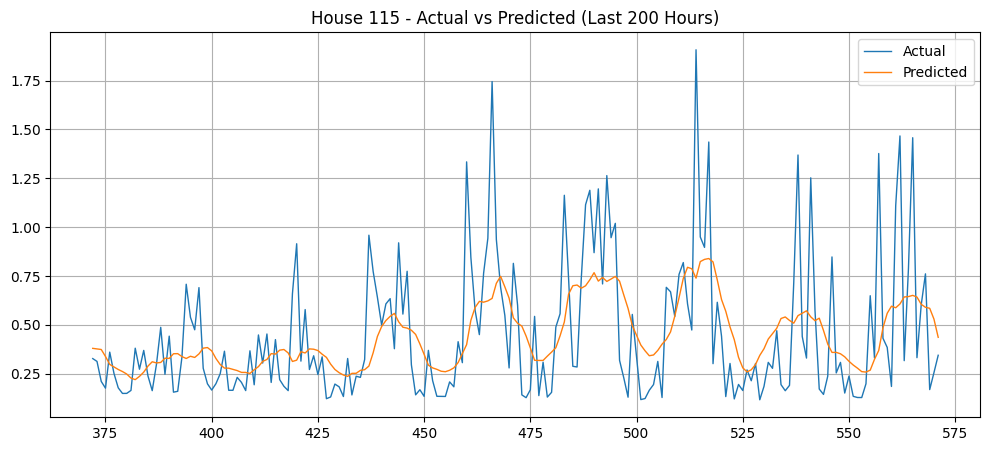

Saved plot: plots_ps1/house_115_last200.png

Training LSTM for House 114
Training samples: 2287 Testing samples: 572
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0196 - mae: 0.0897 - val_loss: 0.0158 - val_mae: 0.0907 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0181 - mae: 0.0858 - val_loss: 0.0152 - val_mae: 0.0849 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0169 - mae: 0.0818 - val_loss: 0.0143 - val_mae: 0.0810 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0154 - mae: 0.0770 - val_loss: 0.0136 - val_mae: 0.0822 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0141 - mae: 0.0729 - val_loss: 0.0126 - val_mae: 0.0776 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 0.0135 - mae: 0.0709 - val_loss: 0.0121 - val_mae: 0.0742 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0131 - mae: 0.0689 - val_loss: 0.0118 - val_mae: 0.0718 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━━

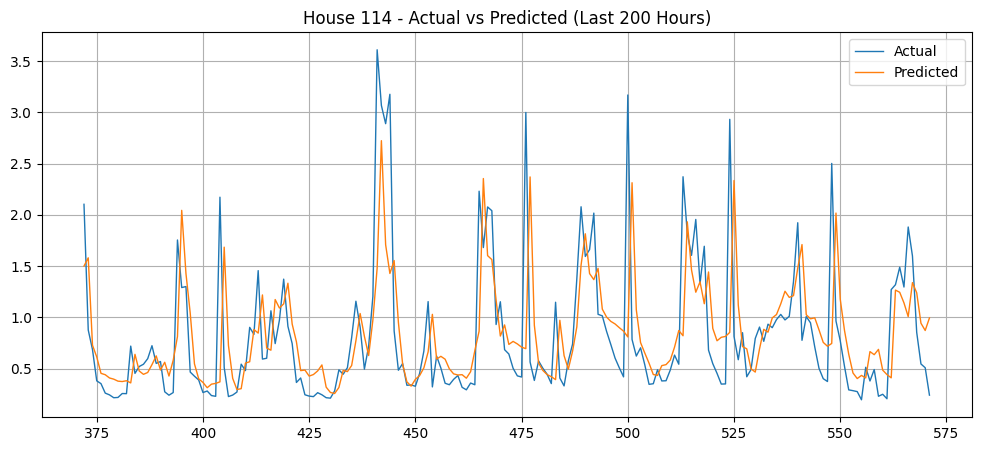

Saved plot: plots_ps1/house_114_last200.png

Training LSTM for House 101
Training samples: 2288 Testing samples: 573
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0117 - mae: 0.0562 - val_loss: 0.0127 - val_mae: 0.0467 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0107 - mae: 0.0517 - val_loss: 0.0119 - val_mae: 0.0546 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0100 - mae: 0.0503 - val_loss: 0.0117 - val_mae: 0.0514 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0098 - mae: 0.0493 - val_loss: 0.0113 - val_mae: 0.0502 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0095 - mae: 0.0478 - val_loss: 0.0113 - val_mae: 0.0515 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0094 - mae: 0.0469 - val_loss: 0.0110 - val_mae: 0.0492 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mae: 0.0461 - val_loss: 0.0109 - val_mae: 0.0487 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━━

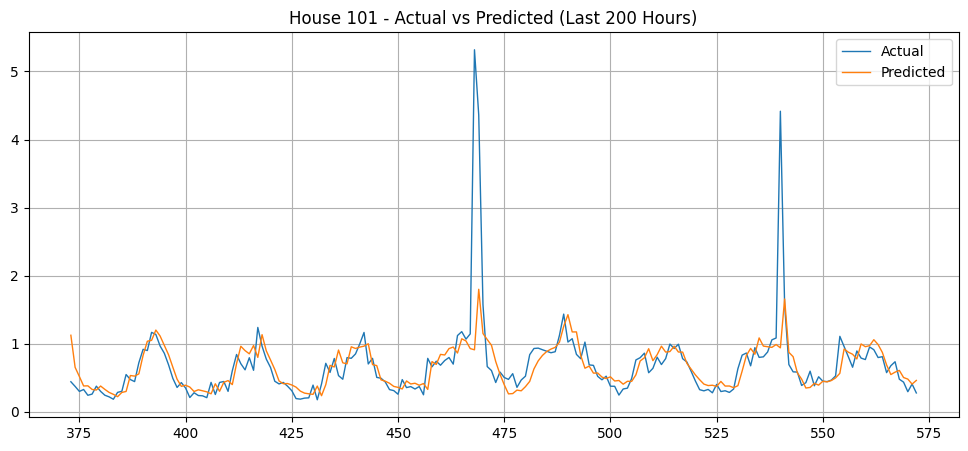

Saved plot: plots_ps1/house_101_last200.png

Training LSTM for House 93
Training samples: 2286 Testing samples: 572
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 27ms/step - loss: 0.0033 - mae: 0.0356 - val_loss: 0.0093 - val_mae: 0.0432 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0030 - mae: 0.0333 - val_loss: 0.0083 - val_mae: 0.0417 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0028 - mae: 0.0323 - val_loss: 0.0078 - val_mae: 0.0435 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0027 - mae: 0.0321 - val_loss: 0.0075 - val_mae: 0.0395 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0026 - mae: 0.0312 - val_loss: 0.0072 - val_mae: 0.0395 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0026 - mae: 0.0310 - val_loss: 0.0071 - val_mae: 0.0387 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 0.0026 - mae: 0.0306 - val_loss: 0.0068 - val_mae: 0.0364 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━

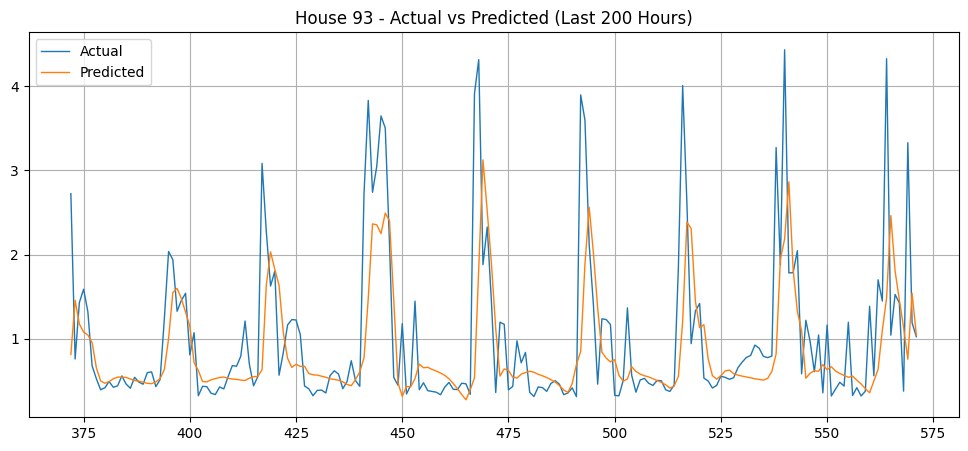

Saved plot: plots_ps1/house_93_last200.png

Training LSTM for House 379
Training samples: 2287 Testing samples: 572
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0168 - mae: 0.0821 - val_loss: 0.0119 - val_mae: 0.0849 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0160 - mae: 0.0805 - val_loss: 0.0115 - val_mae: 0.0828 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0158 - mae: 0.0799 - val_loss: 0.0111 - val_mae: 0.0797 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0155 - mae: 0.0791 - val_loss: 0.0111 - val_mae: 0.0800 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0150 - mae: 0.0773 - val_loss: 0.0109 - val_mae: 0.0800 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0139 - mae: 0.0732 - val_loss: 0.0101 - val_mae: 0.0748 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0124 - mae: 0.0665 - val_loss: 0.0090 - val_mae: 0.0594 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━━

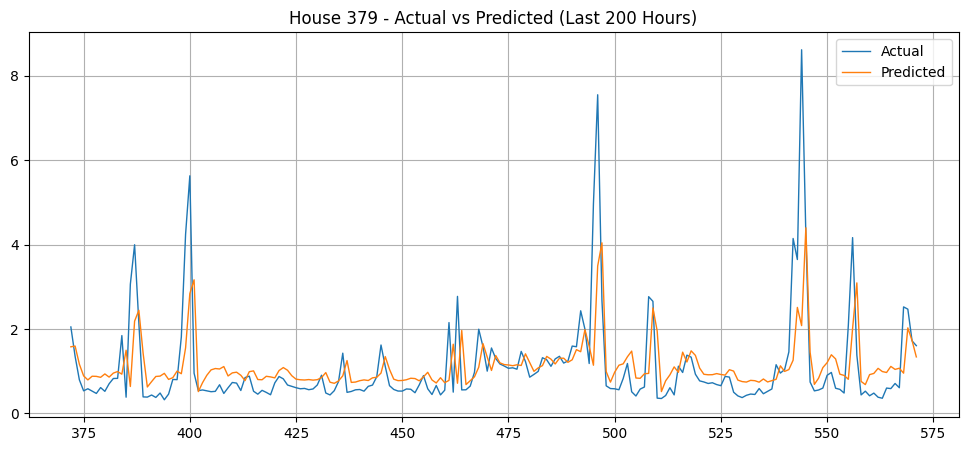

Saved plot: plots_ps1/house_379_last200.png

Training LSTM for House 86
Training samples: 2288 Testing samples: 573
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.0176 - mae: 0.0971 - val_loss: 0.0173 - val_mae: 0.0998 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0121 - mae: 0.0768 - val_loss: 0.0110 - val_mae: 0.0593 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0097 - mae: 0.0634 - val_loss: 0.0108 - val_mae: 0.0583 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0093 - mae: 0.0601 - val_loss: 0.0105 - val_mae: 0.0566 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0090 - mae: 0.0580 - val_loss: 0.0102 - val_mae: 0.0561 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0087 - mae: 0.0568 - val_loss: 0.0099 - val_mae: 0.0541 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0086 - mae: 0.0557 - val_loss: 0.0096 - val_mae: 0.0535 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━━

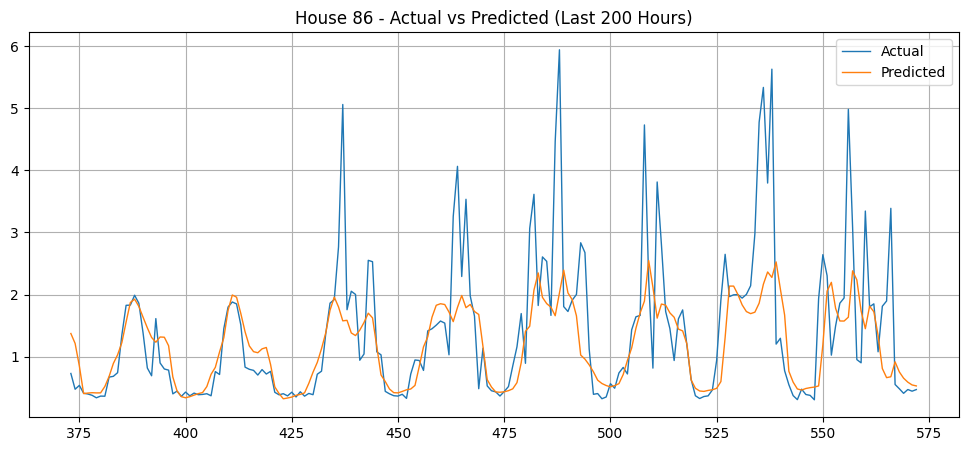

Saved plot: plots_ps1/house_86_last200.png

Training LSTM for House 77
Training samples: 2287 Testing samples: 572
Epoch 1/60


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - loss: 0.0259 - mae: 0.1195 - val_loss: 0.0145 - val_mae: 0.0996 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0221 - mae: 0.1103 - val_loss: 0.0129 - val_mae: 0.0945 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0195 - mae: 0.0994 - val_loss: 0.0102 - val_mae: 0.0804 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0176 - mae: 0.0923 - val_loss: 0.0089 - val_mae: 0.0717 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0160 - mae: 0.0863 - val_loss: 0.0083 - val_mae: 0.0681 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0148 - mae: 0.0801 - val_loss: 0.0096 - val_mae: 0.0777 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0145 - mae: 0.0788 - val_loss: 0.0078 - val_mae: 0.0622 - learning_rate: 0.0010
Epoch 8/60
65/65 ━━━━━━━

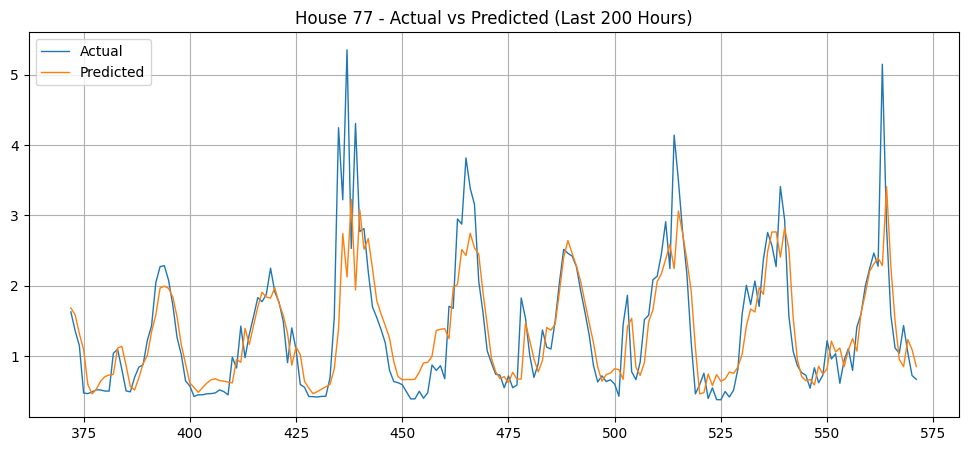

Saved plot: plots_ps1/house_77_last200.png

Training LSTM for House 59
Training samples: 2287 Testing samples: 572


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - loss: 0.0182 - mae: 0.1006 - val_loss: 0.0084 - val_mae: 0.0747 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0129 - mae: 0.0826 - val_loss: 0.0056 - val_mae: 0.0570 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - loss: 0.0105 - mae: 0.0737 - val_loss: 0.0052 - val_mae: 0.0513 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 0.0101 - mae: 0.0716 - val_loss: 0.0052 - val_mae: 0.0552 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0097 - mae: 0.0697 - val_loss: 0.0051 - val_mae: 0.0532 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - loss: 0.0094 - mae: 0.0687 - val_loss: 0.0050 - val_mae: 0.0525 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.0092 - mae: 0.0677 - val_loss: 0.0050 - val_mae: 0.0526 - learning_rate: 0.0010
Epoch 8/60
6

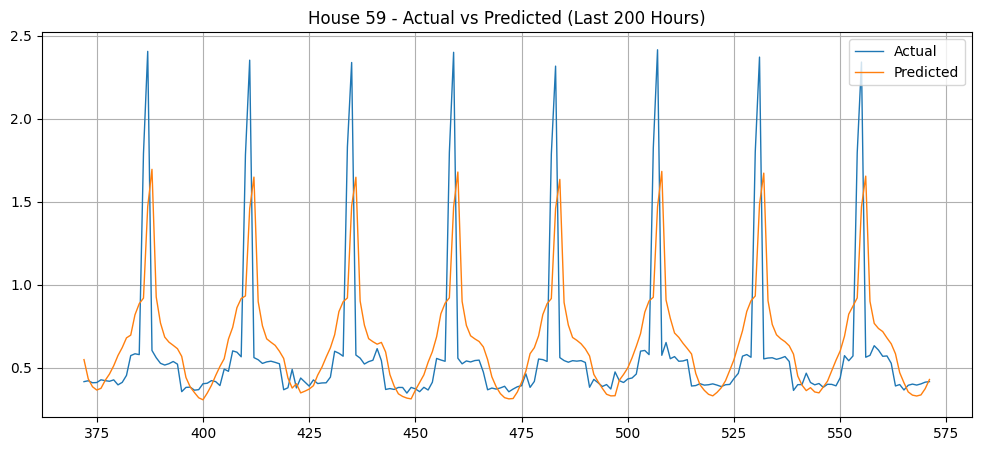

Saved plot: plots_ps1/house_59_last200.png

Training LSTM for House 252
Training samples: 2287 Testing samples: 572


c:\Users\91706\Desktop\FYP\myvenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - loss: 0.0184 - mae: 0.0960 - val_loss: 0.0211 - val_mae: 0.1126 - learning_rate: 0.0010
Epoch 2/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0144 - mae: 0.0835 - val_loss: 0.0176 - val_mae: 0.0907 - learning_rate: 0.0010
Epoch 3/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0131 - mae: 0.0783 - val_loss: 0.0162 - val_mae: 0.0882 - learning_rate: 0.0010
Epoch 4/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0124 - mae: 0.0752 - val_loss: 0.0149 - val_mae: 0.0815 - learning_rate: 0.0010
Epoch 5/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0115 - mae: 0.0718 - val_loss: 0.0141 - val_mae: 0.0768 - learning_rate: 0.0010
Epoch 6/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0107 - mae: 0.0684 - val_loss: 0.0133 - val_mae: 0.0735 - learning_rate: 0.0010
Epoch 7/60
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - loss: 0.0103 - mae: 0.0664 - val_loss: 0.0134 - val_mae: 0.0721 - learning_rate: 0.0010
Epoch 8/60
65

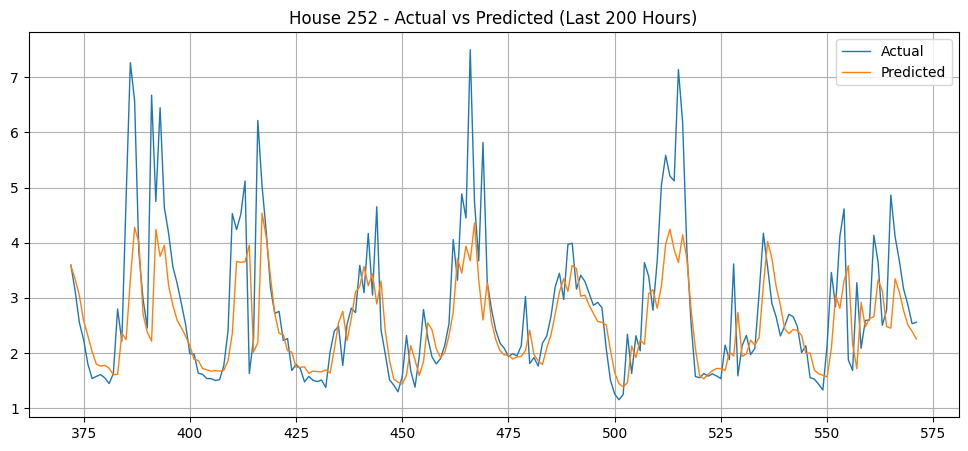

Saved plot: plots_ps1/house_252_last200.png
Saved metrics file: house_wise_lstm_metrics_ps1.csv


In [14]:
results = []
for hid in house_ids:
    print("\n" + "="*60)
    print(f"Training LSTM for House {hid}")

    house_df = df[df['dataid'] == hid].copy()
    house_df = house_df.sort_values('localminute')
    house_df = house_df[['localminute','use']].dropna()

    if len(house_df) < N_STEPS + 10:
        print(f"Skipping House {hid}: Not enough data\n")
        continue

    values = house_df['use'].values.reshape(-1, 1)

    # Scaling per house
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(values)

    joblib.dump(scaler, f"{SCALER_DIR}/scaler_{hid}.joblib")

    # Create sequences
    X, y = create_sequences(scaled, N_STEPS)

    # Train-test split
    split = int(0.8 * len(X))
    X_train, X_test = X[:split], X[split:]
    y_train, y_test = y[:split], y[split:]

    print("Training samples:", len(X_train), "Testing samples:", len(X_test))

    model = build_model(N_STEPS)

    es = EarlyStopping(monitor='val_loss', patience=PATIENCE, restore_best_weights=True)
    rl = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

    #model = tf.keras.models.load_model("model_ps1")

    history = model.fit(
        X_train, y_train,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        validation_split=VALIDATION_SPLIT,
        callbacks=[es, rl],
        verbose=1
    )

    model.save(f"{MODEL_DIR}/lstm_house_{hid}.keras")
    print("Saved model for house:", hid)

    # Predict
    preds_scaled = model.predict(X_test).reshape(-1, 1)
    y_test_scaled = y_test.reshape(-1, 1)

    preds = scaler.inverse_transform(preds_scaled)
    y_true = scaler.inverse_transform(y_test_scaled)

    # Metrics
    mae = np.mean(np.abs(preds - y_true))
    rmse = np.sqrt(np.mean((preds - y_true)**2))

    print(f"MAE = {mae:.4f} | RMSE = {rmse:.4f}")

    #  Store metrics
    results.append([hid, round(mae,4), round(rmse,4)])

    # Plot last 200 hours
    start_idx = split + N_STEPS
    time_index = house_df['localminute'].iloc[start_idx : start_idx + len(y_true)].reset_index(drop=True)

    df_plot = pd.DataFrame({
        "time": time_index,
        "actual": y_true.flatten(),
        "predicted": preds.flatten()
    })

    df_last = df_plot.tail(LAST_N_HOURS_TO_PLOT)

    plt.figure(figsize=(12,5))
    plt.plot(df_last['actual'], label="Actual", linewidth=1)
    plt.plot(df_last['predicted'], label="Predicted", linewidth=1)
    plt.title(f"House {hid} - Actual vs Predicted (Last 200 Hours)")
    plt.legend()
    plt.grid()

    plot_path = f"{PLOTS_DIR}/house_{hid}_last200.png"
    plt.savefig(plot_path, dpi=150)
    plt.show()

    print(f"Saved plot: {plot_path}")

# Save all metrics to CSV
results_df = pd.DataFrame(results, columns=["house_id", "mae", "rmse"])
results_df.to_csv("house_wise_lstm_metrics_ps1.csv", index=False)
print("Saved metrics file: house_wise_lstm_metrics_ps1.csv")

In [15]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import os

statistical_rows = []

def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

for house_id in df["dataid"].unique():

    model_path = f"models_ps1/lstm_house_{house_id}.keras"
    scaler_path = f"scalers_ps1/scaler_{house_id}.joblib"

    if not os.path.exists(model_path):
        continue

    model = load_model(model_path)
    scaler = joblib.load(scaler_path)

    temp = df[df["dataid"] == house_id][['use']].dropna()

    scaled = scaler.transform(temp.values)
    X, y = create_sequences(scaled, 24)
    y_pred = model.predict(X)

    # inverse scaling
    y_true = scaler.inverse_transform(y)
    y_pred = scaler.inverse_transform(y_pred)

    y_true = y_true.flatten()
    y_pred = y_pred.flatten()

    # Statistical comparison
    statistical_rows.append([
        house_id,
        np.mean(y_true),
        np.mean(y_pred),
        np.std(y_true),
        np.std(y_pred),
        np.min(y_true),
        np.min(y_pred),
        np.max(y_true),
        np.max(y_pred),
        np.median(y_true),
        np.median(y_pred),
        pd.Series(y_true).corr(pd.Series(y_pred)),
        np.var(y_true),
        np.var(y_pred),
        (np.max(y_true) - np.min(y_true)),
        (np.max(y_pred) - np.min(y_pred))
    ])

# Build DataFrame
df_stats2 = pd.DataFrame(
    statistical_rows,
    columns=[
        "House",
        "Actual Mean", "Pred Mean",
        "Actual STD", "Pred STD",
        "Actual Min", "Pred Min",
        "Actual Max", "Pred Max",
        "Actual Median", "Pred Median",
        "Correlation (True vs Pred)",
        "Actual Variance", "Pred Variance",
        "Actual Range", "Pred Range"
    ]
)

# Save File
df_stats2.to_csv("actual_vs_predicted_statistics_ps1.csv", index=False)
df_stats2


90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step


,House,Actual Mean,Pred Mean,Actual STD,Pred STD,Actual Min,Pred Min,Actual Max,Pred Max,Actual Median,Pred Median,Correlation (True vs Pred),Actual Variance,Pred Variance,Actual Range,Pred Range
0,26,0.870802,0.867616,0.785894,0.517239,0.186933,0.364046,7.086350,4.484565,0.555125,0.672171,0.637772,0.617629,0.267536,6.899417,4.120518
1,222,2.969696,3.077848,1.963347,1.675271,0.327450,0.725251,12.726433,10.799318,2.707092,2.751384,0.822029,3.854733,2.806532,12.398983,10.074067
2,187,1.304742,1.288921,0.860937,0.532134,0.236500,0.464502,7.125933,4.720137,1.010842,1.170618,0.637719,0.741213,0.283166,6.889433,4.255635
3,171,0.517385,0.504749,0.406904,0.180809,0.182281,0.198291,4.247533,1.456401,0.401783,0.467503,0.502936,0.165571,0.032692,4.065252,1.258111
4,370,1.194193,1.220866,1.000242,0.601112,0.410433,0.493912,6.637867,4.884619,0.817533,1.026306,0.645620,1.000485,0.361335,6.227433,4.390707
5,115,0.418688,0.404908,0.522772,0.234956,0.087850,0.150603,4.455517,1.608395,0.247333,0.317888,0.464672,0.273291,0.055204,4.367667,1.457793
6,114,0.859783,0.868987,0.797814,0.512372,0.193100,0.148585,6.111200,3.667326,0.678133,0.779267,0.624824,0.636508,0.262525,5.918100,3.518741
7,101,0.489078,0.488541,0.563176,0.309899,0.114733,0.094150,5.317633,2.542337,0.325600,0.388680,0.549097,0.317167,0.096038,5.202900,2.448187
8,93,0.642904,0.629996,0.424592,0.242517,0.294067,0.277137,5.378283,3.125326,0.528308,0.558917,0.584154,0.180279,0.058815,5.084217,2.848188
9,379,1.205280,1.221550,1.087805,0.600299,0.283100,0.013821,8.617333,5.619394,0.847283,1.021176,0.554588,1.183319,0.360359,8.334233,5.605573


In [16]:
import pandas as pd
import numpy as np
import joblib
from tensorflow.keras.models import load_model
import os

hour_rows = []

def create_sequences(data, seq_len=24):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

for house_id in df["dataid"].unique():

    model_path = f"models_ps1/lstm_house_{house_id}.keras"
    scaler_path = f"scalers_ps1/scaler_{house_id}.joblib"

    if not os.path.exists(model_path):
        continue

    print(f"Processing hour-level stats for House {house_id}...")

    model = load_model(model_path)
    scaler = joblib.load(scaler_path)

    temp = df[df["dataid"] == house_id][['use']].dropna()

    # scale
    scaled = scaler.transform(temp.values)
    X, y = create_sequences(scaled, 24)
    y_pred = model.predict(X)

    # inverse scale
    y_true = scaler.inverse_transform(y).flatten()
    y_pred = scaler.inverse_transform(y_pred).flatten()

    # Build row-by-row stats
    for idx in range(len(y_true)):
        actual = y_true[idx]
        predicted = y_pred[idx]
        error = predicted - actual
        
        hour_rows.append([
            house_id,
            idx,                         # Time index for this house
            actual,
            predicted,
            error,
            abs(error),
            error**2,
            (abs(error) / actual * 100) if actual != 0 else None
        ])

# Create DataFrame
df_hour_stats = pd.DataFrame(
    hour_rows,
    columns=[
        "House",
        "HourIndex",
        "Actual",
        "Predicted",
        "Error",
        "AbsoluteError",
        "SquaredError",
        "PercentageError"
    ]
)

# Save to CSV
df_hour_stats.to_csv("hour_level_stats_ps1.csv", index=False)
df_hour_stats


Processing hour-level stats for House 26...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Processing hour-level stats for House 222...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step
Processing hour-level stats for House 187...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Processing hour-level stats for House 171...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step
Processing hour-level stats for House 370...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
Processing hour-level stats for House 115...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Processing hour-level stats for House 114...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
Processing hour-level stats for House 101...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step
Processing hour-level stats for House 93...
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
Processing hour-level stats for House 379...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Processing hour-level stats for House 86...
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Processing hour-level stats for House 77...
90/90 ━━━━━━━━━━━━━━━━━━

,House,HourIndex,Actual,Predicted,Error,AbsoluteError,SquaredError,PercentageError
0,26,0,0.501667,0.539219,0.037552,0.037552,0.001410,7.485507
1,26,1,0.448417,0.543386,0.094969,0.094969,0.009019,21.178810
2,26,2,0.415617,0.521371,0.105755,0.105755,0.011184,25.445207
3,26,3,0.413850,0.486665,0.072815,0.072815,0.005302,17.594470
4,26,4,0.469883,0.458028,-0.011855,0.011855,0.000141,2.522970
...,...,...,...,...,...,...,...,...
40024,252,2854,3.674633,3.104456,-0.570177,0.570177,0.325102,15.516579
40025,252,2855,3.161167,2.770472,-0.390695,0.390695,0.152643,12.359206
40026,252,2856,2.878017,2.512075,-0.365942,0.365942,0.133913,12.715066
40027,252,2857,2.530400,2.392644,-0.137756,0.137756,0.018977,5.444043
